In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking for empty values
pd.isnull(diabetes).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
high_bp = diabetes.sort_values('BloodPressure', ascending = False)
high_bp[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
691,13,158,114,0,0,42.3,0.257,44,1
43,9,171,110,24,240,45.4,0.721,54,1
549,4,189,110,31,0,28.5,0.680,37,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
84,5,137,108,0,0,48.8,0.227,37,1
662,8,167,106,46,231,37.6,0.165,43,1
672,10,68,106,23,49,35.5,0.285,47,0
658,11,127,106,0,0,39.0,0.190,51,0


Somewhat surprisingly to me, many of the individuals with the highest blood pressure don't have diabetes. I will check and see what other variables might be significant.

In [7]:
high_glucose = diabetes.sort_values('Glucose', ascending = False)
high_glucose[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
561,0,198,66,32,274,41.3,0.502,28,1
228,4,197,70,39,744,36.7,2.329,31,0
8,2,197,70,45,543,30.5,0.158,53,1
579,2,197,70,99,0,34.7,0.575,62,1
408,8,197,74,0,0,25.9,1.191,39,1
359,1,196,76,36,249,36.5,0.875,29,1
22,7,196,90,0,0,39.8,0.451,41,1
206,8,196,76,29,280,37.5,0.605,57,1
675,6,195,70,0,0,30.9,0.328,31,1


Not too surprisingly, high glucose seems to be very connected with having diabetes. 

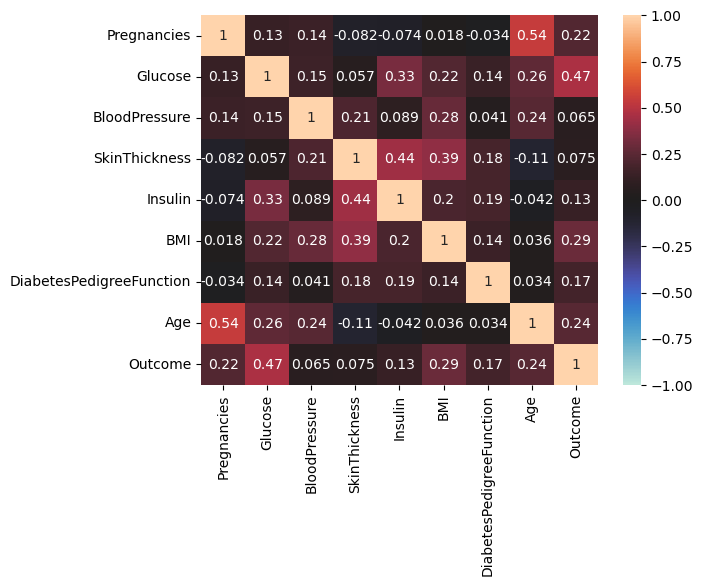

In [8]:
corr_diabetes = diabetes.corr(method = "pearson")
heatmap = sns.heatmap(corr_diabetes, vmin = -1, vmax = 1, center = 0, annot = True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

ind_vars = diabetes[['Pregnancies','Glucose', 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']]

vif_data = pd.DataFrame()
vif_data["var"] = ind_vars.columns

vif_data["VIF"] = [vif(ind_vars.values, i) for i in range(len(ind_vars.columns))]

print(vif_data)

                        var        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


Glucose, BMI, BloodPressure, and Age all have very high VIF's - I will need to remove a few when I run the regression. 

For now I note that Glucose has the highest correlation with our outcome variable (at moderate strength), so I want to visualize this.

[Text(0.5, 1.0, 'Glucose vs Outcome Correlation')]

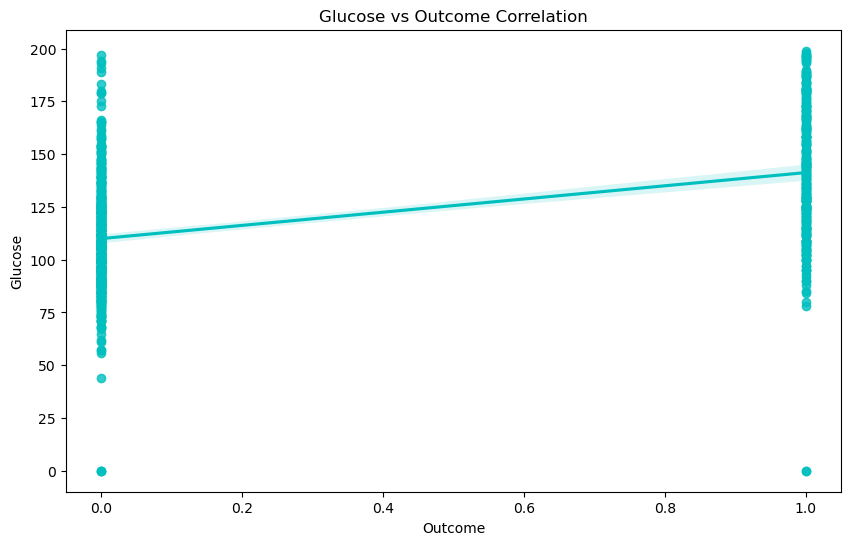

In [29]:
plt.figure(figsize = (10, 6))
sns.regplot(data = diabetes, y = 'Glucose', x = 'Outcome', color = 'c').set(title = "Glucose vs Outcome Correlation" )

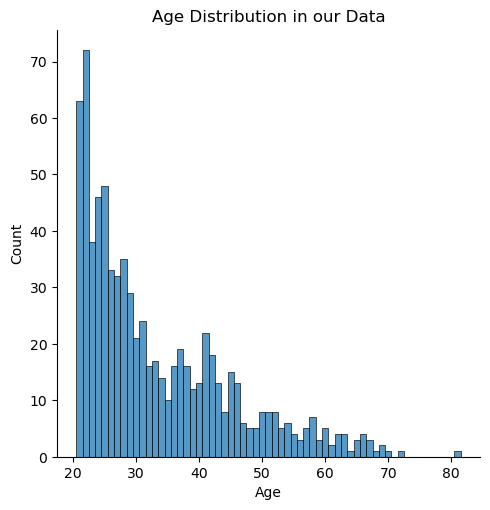

In [36]:
import warnings
warnings.filterwarnings("ignore")

sns.displot(diabetes['Age'],discrete = True).set(title = 'Age Distribution in our Data')

Now I want to try running regressions until I can find a good model.

In [42]:
from plotnine import *

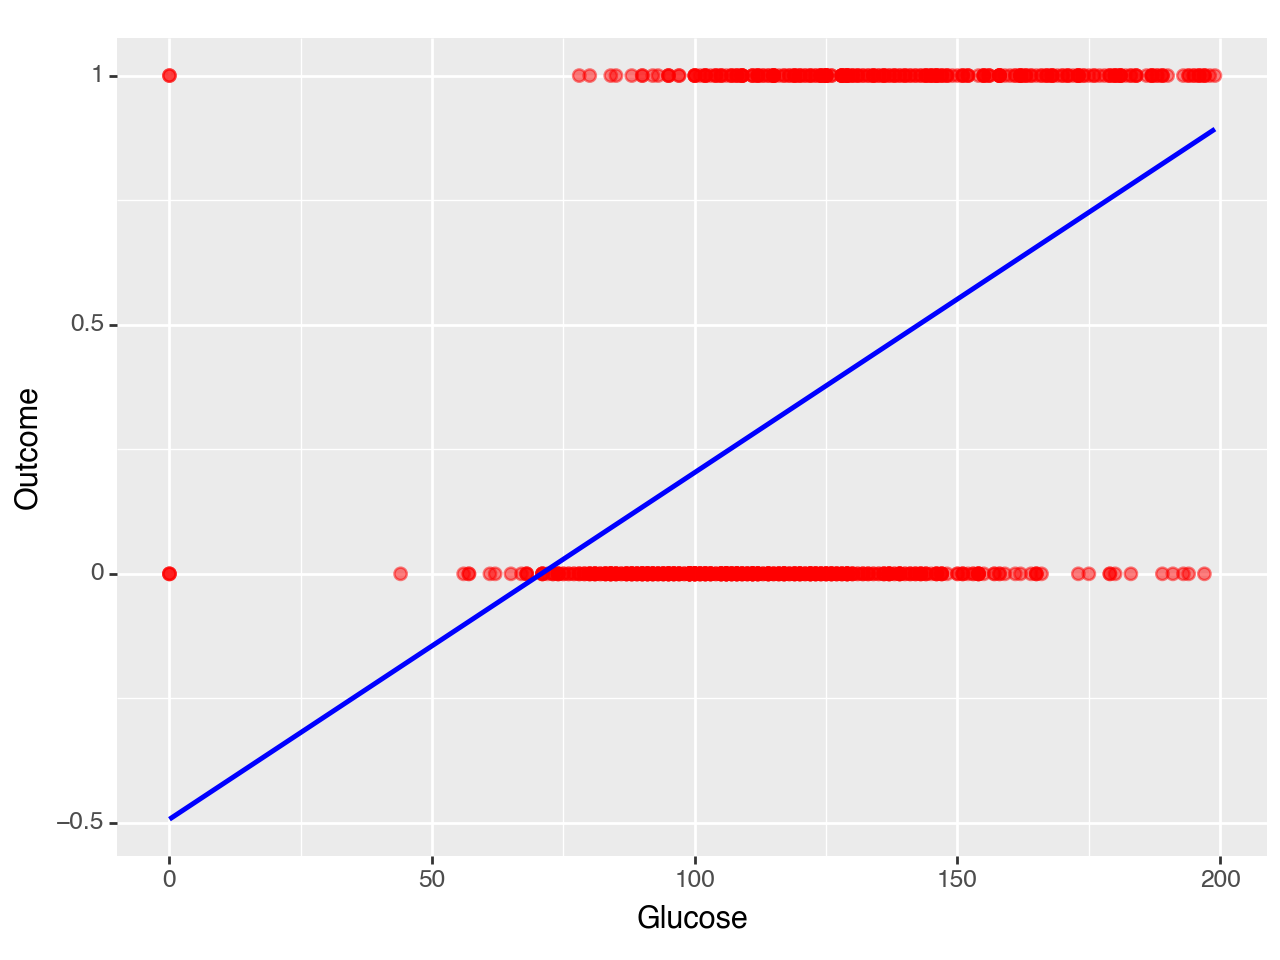

<Figure Size: (640 x 480)>

In [43]:
p1 = (
    ggplot(data = diabetes)
    + geom_point(aes(x = 'Glucose', y = 'Outcome'), color="red", size=2, alpha=0.5))
p1 + geom_smooth(
    aes(x="Glucose", y="Outcome"), method="lm", color="blue", formula="y~x", se=False
)

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
X = diabetes.drop(columns = ['Outcome'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.7207792207792207

Conclusion: Decision Tree Classifier is not super accurate. Results varying between 60-85% so I will move on to regression for higher accuracy.

In [38]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     37.20
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           4.73e-48
Time:                        22:58:48   Log-Likelihood:                -289.81
No. Observations:                 614   AIC:                             597.6
Df Residuals:                     605   BIC:                             637.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Now lets remove non-significant or high VIF variables and run a new regression:

In [40]:
X_train2 = X_train.drop(['SkinThickness', 'Insulin', 'Age'], axis=1)
_test2 = X_test.drop(['SkinThickness', 'Insulin', 'Age'], axis =1)


X_train_sm = sm.add_constant(X_train2)

model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.27e-49
Time:                        23:03:06   Log-Likelihood:                -292.26
No. Observations:                 614   AIC:                             596.5
Df Residuals:                     608   BIC:                             623.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We now have a good regression model with a very low p-value for all of our predictors, and I think it is good enough that we don't have to great a logistic regression model.